In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt


In [2]:
#importing data from the csv file
data = pd.read_csv('/home/sathwik/Storage/100DaysOfCode/DATASETS/Linear Regression/Boston.csv')
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


/home/sathwik/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'chas'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rm'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'black'}>],
       [<AxesSubplot:title={'center':'lstat'}>,
        <AxesSubplot:title={'center':'medv'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

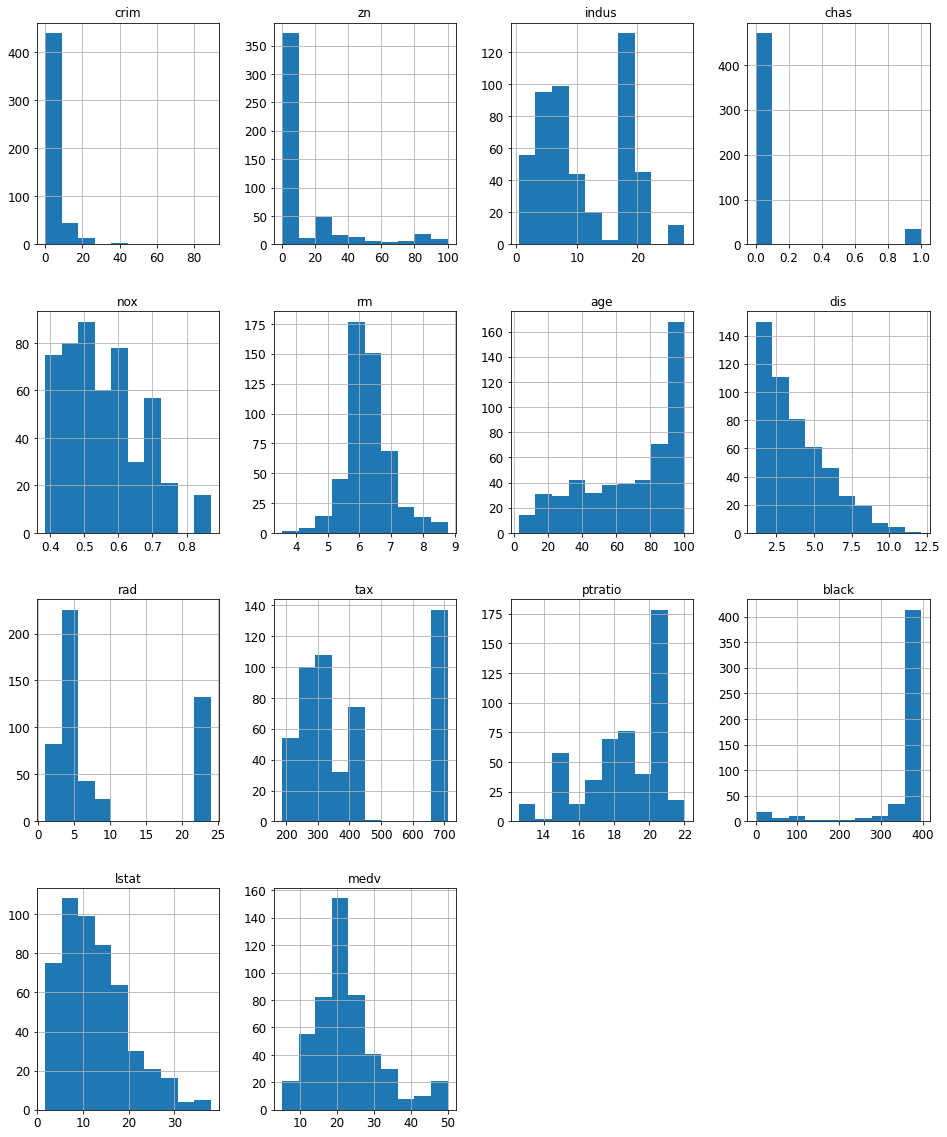

In [3]:
#dataset cleaning
data=data.drop(['Unnamed: 0'],axis=1)
data.hist(figsize=(16, 20),xlabelsize=12, ylabelsize=12)

<AxesSubplot:>

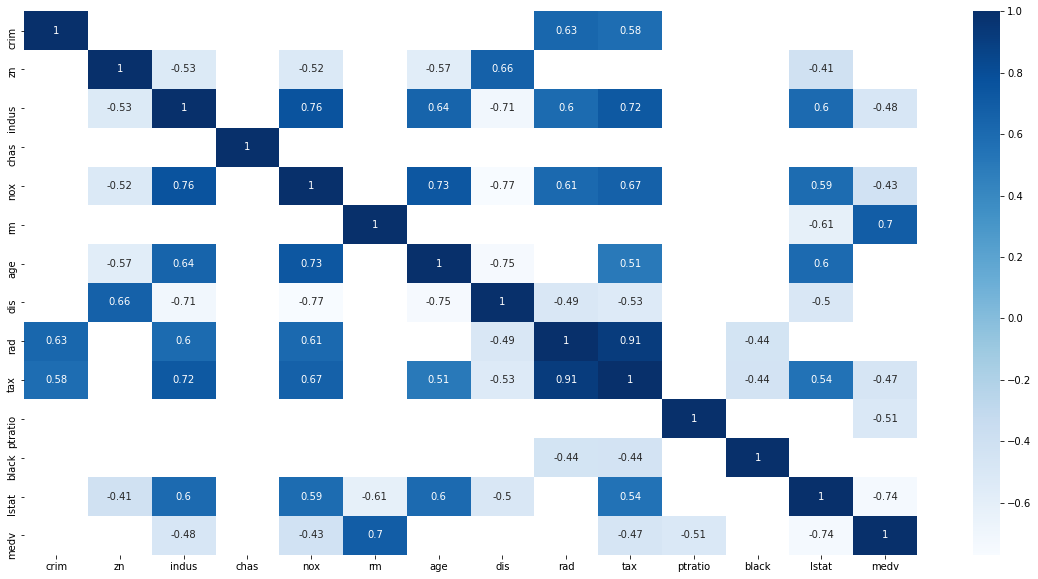

In [4]:
cor=data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor[(cor >= 0.5) | (cor <= -0.4)],annot=True,cmap='Blues')

In [5]:
#finding corelation between columns of the data
data.corr()['medv'][:-1]

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
black      0.333461
lstat     -0.737663
Name: medv, dtype: float64

In [6]:
'''
positive corelation with
    1.residential land zoned for lots over 25,000 sq.ft.                        0.36 
    2.average number of rooms per housing                                       0.69    **
    3.weighted distances to five Boston employment centres                      0.24
    4.proportion of blacks by town                                              0.33
negative proportion with
    1.per capita crime rate by town                                            -0.38
    2.proportion of non-retail business acres per town                         -0.48
    3.nitric oxides concentration                                              -0.42
    4.proportion of owner-occupied units built prior to 1940                   -0.37
    5.index of accessibility to radial highways                                -0.38
    6.full-value property-tax rate per $10,000                                 -0.46
    7.pupil-teacher ratio by town                                              -0.50
    8.% lower status of the population                                         -0.73     **

considerable columns = RM,LSTAT
'''


'\npositive corelation with\n    1.residential land zoned for lots over 25,000 sq.ft.                        0.36 \n    2.average number of rooms per housing                                       0.69    **\n    3.weighted distances to five Boston employment centres                      0.24\n    4.proportion of blacks by town                                              0.33\nnegative proportion with\n    1.per capita crime rate by town                                            -0.38\n    2.proportion of non-retail business acres per town                         -0.48\n    3.nitric oxides concentration                                              -0.42\n    4.proportion of owner-occupied units built prior to 1940                   -0.37\n    5.index of accessibility to radial highways                                -0.38\n    6.full-value property-tax rate per $10,000                                 -0.46\n    7.pupil-teacher ratio by town                                             

In [7]:
#prepating testing and training dataset
y=data['medv']
# x=data['lstat']
# x=pd.DataFrame({'lstat': data['lstat'], 'rm':data['rm'],'tax':data['tax'],'indus':data['indus'],'nox':data['nox'],'ptratio':data['ptratio'],
# })
#'zn':data['zn']

x=data.drop('medv',axis=1)
#splittign the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#check size
print (x_train.shape,y_train.shape)
print (x_test.shape,y_test.shape)



(404, 13) (404,)
(102, 13) (102,)


In [8]:
#import model
from sklearn.linear_model import LinearRegression
#training the model
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)
#predicting the datset values
y_pred = linear_reg.predict(x_test)


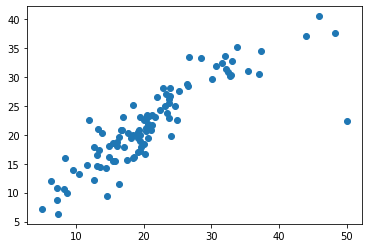

In [9]:
plt.scatter(y_test, y_pred) 

In [10]:
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(y_test, y_pred) 
print("Mean Square Error : ", mse) 

Mean Square Error :  19.782310487654158


In [11]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df2 = df1.head(10)
df2

,Actual,Predicted
476,16.7,20.804745
167,23.8,22.877935
130,19.2,20.422729
149,15.4,15.529370
126,15.7,15.545681
105,19.5,18.874968
30,12.7,12.134992
332,19.4,23.111474
49,19.4,17.172218
415,7.2,10.868294


In [12]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE', metrics.mean_absolute_error(y_test, y_pred))
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared error', r2_score(y_test, y_pred))

#65% avg

MAE 3.0293865539516385
MSE 19.782310487654158
RMSE 4.447730936967091
R squared error 0.7444595437255764
